# Extended Graham scan algorithm

Use the cell below for all python code needed to realise the extended Graham scan algorithm (including any auxiliary data structures and functions you might need). The `extendedgrahamscan()` function itself should take as input parameter a list of 2D points (`inputSet`), and return the subset of such points that lie on the convex hull (`outputSet`).

In [1]:
import math 

def cross_product(a, b, c):
    #   If the result is negative, a->c is clockwise to a->b
    #   Elif the result is positive, a->c is anti-clockwise to a->b
    #   Else the result is zero, so b and c are colinear
    x_1 = a[0] - b[0] #Difference in x of a and b
    x_2 = a[0] - c[0] #'' of a and c
    y_1 = a[1] - b[1] #Difference in y of a and b
    y_2 = a[1] - c[1] #'' of a and c
    return y_2 * x_1 - y_1 * x_2

def find_corners(points):
    left = points[0]
    right = points[0]
    high = points[0]
    low = points[0]
    for point in points:
        if point[0]<left[0]:
            left = point
        elif point[0]>right[0]:
            right = point
          
        if point[1]>high[1]:
            high = point
        elif point[1]<low[1]:
            low = point
    return [left, high, right, low]

def p_in_quad(point, corners):    
    for i in range(-1, len(corners)-1):
        if not (cross_product(corners[i], point, corners[i+1])>0 or cross_product(corners[i], point, corners[i-1])>0):
                return False
    return True

def optimise(points):
    corners = find_corners(points)
    new_points = []
    for point in points:
        if not p_in_quad(point, corners):
            new_points.append(point)
    return new_points

def heapify(listOfPoints,lowPoint, size , i):
    #i isa the root of the subtree
    largest = i 
    left = 2*i +1
    right = 2*i +2
    #check if left child exists and is bigger than root
    if left < size and polarAngle(listOfPoints[largest], lowPoint) < polarAngle(listOfPoints[left], lowPoint) :
        largest = left

    #same with right child and being bigger than the largest
    if right < size and  polarAngle(listOfPoints[largest], lowPoint) < polarAngle(listOfPoints[right], lowPoint):
        largest = right
        
    # if it changed swap
    if largest != i :
        (listOfPoints[i], listOfPoints[largest]) = (listOfPoints[largest], listOfPoints[i])
        #apply the function again on the swapped root's new subtree
        heapify(listOfPoints, lowPoint, size, largest)

def heapsort(listOfPoints, lowPoint):
    n = len(listOfPoints)
    #start at the last parent which is located at index n/2 - 1
    # we build the heap from the bottom up
    for i in range (n//2 -1, -1, -1):
        heapify (listOfPoints, lowPoint,n, i)

    for i in range(n-1, 0 , -1):
        listOfPoints[i], listOfPoints[0] = listOfPoints[0], listOfPoints[i]
        #heapify the root after swapping(sinking)
        heapify (listOfPoints, lowPoint, i, 0)

def Radius(point, lowPoint):
    #compute the distance in with the reference in case two colinear points are found
    r = math.sqrt((((point[0] - lowPoint[0])**2) + ((point[1] - lowPoint[1])**2)))
    return r

def polarAngle (point, lowPoint):
    Y_total = point[1] - lowPoint[1]
    X_total = point[0] - lowPoint[0]
    if Y_total == 0 and X_total == 0:
        return -math.inf #different from 0 so as to not cause any problem for any angle comparison as it is a special point
    else :
        return math.atan2(Y_total,X_total)   
        
    
def find_lowest(points):
    lowest = points[1]
    for point in points:
        if point[1]<lowest[1]:
            lowest = point  
    return lowest    
    
def find_highest(points):
    highest = points[1]
    for point in points:
        if point[1]>highest[1]:
            highest = point       
    return highest

def find_rightmost(points):
    rightmost = points[0]

    for point in points:
        if point[0]>rightmost[0]:
            rightmost = point
            
    return rightmost

def find_leftmost(points):
    #Set an abitrary point in set to be initial leftmost
    leftmost = points[0]
    #For each point in the set, if its x value is lower than the current leftmost's, it's the new leftmost
    for point in points:
        if point[0]<leftmost[0]:
            leftmost = point
    return leftmost    
    
def removeCOfromQuad(inputData):
    quadCO = [find_leftmost(inputData), find_rightmost(inputData), find_lowest(inputData), find_highest(inputData)]
    newData = []
    for point in inputData:
        if (point in quadCO):
            newData.append(point)
        else:
            if (not inQuad(quadCO, point)):
                newData.append(point)   
            
    print(quadCO)
    return(inputData)

def inQuad(quadCO, point):
    p_x = point[0]
    p_y = point[1]
    return True

def removeColinear(sortedPoints, lowPoint):
    for i in range(len(sortedPoints)-1, 0, -1):
        if polarAngle(sortedPoints[i], lowPoint) == polarAngle(sortedPoints[i-1], lowPoint) :
            if Radius(sortedPoints[i], lowPoint) <= Radius(sortedPoints[i-1], lowPoint):
                del sortedPoints[i]
            else :
                del sortedPoints[i-1]
                
#function to find lowest and leftmost point
def lowy_left(inputData):
    lowPoint = [math.inf, math.inf]
    for point in inputData:
        #find the point with the lowest y coordinate
        if point[1] < lowPoint[1]:
            lowPoint[0] = point [0]
            lowPoint[1] = point [1]
        #if two points have the same y check which one has the smaller x coordinate
        elif point[1] == lowPoint[1] and point[0] < lowPoint[0]:
            lowPoint[0] = point [0]
            lowPoint[1] = point [1]
    return lowPoint

def clockwiseTurns(p1, p2, p3):
    #p1 is the point next to the top of the stack
    #p2 is the point at the top of the stack
    #p3 is the point we are checking
    #we check the slopes to see the orientation
    #the following formula shows whether or not the slope of p1p2 is higher or lower than the one of p2 and p3
    return ( (p2[1] - p1[1])*(p3[0] - p2[0]) - (p3[1] - p2[1])*(p2[0] - p1[0]) )

def grahamscan(inputSet):
    #let points be the list of points
    #let stack = empty_stack()
    points = optimise(inputSet) #list of points
    outputSet = [] #outputSet is used as a stack
    
    #find the lowest y-coordinate and leftmost point, called P0
    lowPoint = lowy_left(inputSet)
    heapsort(points, lowPoint)
    removeColinear(points,lowPoint)
    
    for currentPoint in points:
        while len(outputSet) > 1 and clockwiseTurns(outputSet[-2], outputSet[-1], currentPoint) >= 0:   
            outputSet.pop()
        outputSet.append(currentPoint)    
    return outputSet 

Use the cell below for all python code needed to generate test data points (both random and those representing worst-case scenario).

In [2]:
import random

maximumX = 32767
maximumY = 32767
minX = 0
minY = 0
mid = [(maximumX-minX)/2, (maximumY-minY)/2]
data_points = [100,500,1000,5000,10000,15000,20000]

# code for random data generation
def random_data_generation(n):
    points = []
    for p in range(n):
        while True:
            x = random.randint(minX, maximumX)
            y = random.randint(minY, maximumY)
            point = [x,y]
            if point not in points:
                break
        points.append(point) 
    return points

# code for worst case data generation
def worst_data_generation(n):
    points = [[1,1],[30000,1],[15000,30000]]
    while len(points)<=n:
        x = random.randint(1, 30000)
        y = random.randint(1, 30000)
        point = [x,y]
        if cross_product([1,1],point,[30000,1])<0 and cross_product([30000,1],point,[15000,30000])<0 and cross_product([15000,30000],point,[1,1])<0 and point not in points:
            points.append(point)
    return points

Use the cell below for all python code needed to test the `extendedgrahamscan()` function on the data generated above.

In [3]:
import timeit

#test code for random data generation
def random_time(points, iterations):
    time_data = []
    data = random_data_generation(points)
    total_time = 0
    for i in range(iterations):
        start_time = timeit.default_timer()
        grahamscan(data)
        time = timeit.default_timer() - start_time
        time_data.append(time)
    return time_data

#test code for worst case data generation
def worst_time(points, iterations):
    time_data = []
    data = worst_data_generation(points)
    total_time = 0
    for i in range(iterations):
        start_time = timeit.default_timer()
        grahamscan(data)
        time = timeit.default_timer() - start_time
        time_data.append(time)
    return time_data

*Optional*: Feel free to use the code below on small datasets (e.g., N = 10) to visually inspect whether the algorithm has been implemented correctly. The fragment below assumes both `inputSet` and `outputSet` to be lists of 2D points, with each point being a list of 2 elements (e.g., `[[x1,y1], [x2,y2], ..., [x_k,y_k]]`)

## Plot Graph

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# plot a scattergraph with a line of best fit for all execution timings across 5 iterations  
def plot_scatter(x, y):
    #plot scattergraph
    plt.scatter(x,y)
    plt.title("Scatterplot of Results through 5 Iterations")
    plt.xlabel("Number of Points")
    plt.ylabel("Time (sec)") 
    
    #plot best-fit line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='red')
    plt.show()

## Test for Random Case

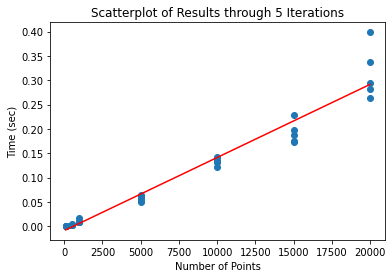

The mean time for random cases for 100 data points are: 0.0007971799999836549 seconds
The mean time for random cases for 500 data points are: 0.0036207999999987805 seconds
The mean time for random cases for 1000 data points are: 0.0105454800000075 seconds
The mean time for random cases for 5000 data points are: 0.056957460000000994 seconds
The mean time for random cases for 10000 data points are: 0.1330884200000014 seconds
The mean time for random cases for 15000 data points are: 0.19264601999999514 seconds
The mean time for random cases for 20000 data points are: 0.31531853999999837 seconds


In [5]:
all_random_time = []
scatter_data = []
total_mean_time = []
count = 0
iterations = 5

for i in data_points:
    all_random_time = random_time(i, iterations)
    for data in all_random_time:
        scatter_data.append([i, data])

#plot scattergraph of results
input_xs, input_ys = zip(*scatter_data)
plot_scatter(input_xs, input_ys)

#to group tuple in groups of 5
def grouper(n, iterable): 
    args = [iter(iterable)] * n 
    return zip(*args) 

#print mean execution timings of each data point
group = tuple(grouper(5, input_ys))  
total_mean_time = [sum(tup) for tup in group]
for i in data_points:
    print("The mean time for random cases for", i, "data points are:", (total_mean_time[count]/5), "seconds")
    count += 1


## Test for Worst Case

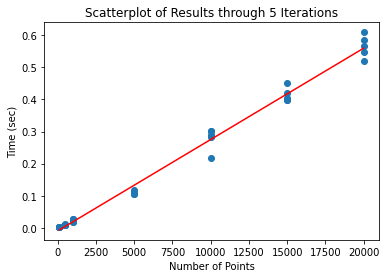

The mean time for worst cases for 100 data points are: 0.0013746599999990394 seconds
The mean time for worst cases for 500 data points are: 0.00936907999999903 seconds
The mean time for worst cases for 1000 data points are: 0.02308549999997922 seconds
The mean time for worst cases for 5000 data points are: 0.11036844000000201 seconds
The mean time for worst cases for 10000 data points are: 0.2783904399999869 seconds
The mean time for worst cases for 15000 data points are: 0.414363139999989 seconds
The mean time for worst cases for 20000 data points are: 0.5652405400000134 seconds


In [6]:
all_worst_time = []
scatter_data = []
total_mean_time = []
count = 0
iterations = 5

for i in data_points:
    all_worst_time = worst_time(i, iterations)
    for data in all_worst_time:
        scatter_data.append([i, data])

#plot scattergraph of results
input_xs, input_ys = zip(*scatter_data)
plot_scatter(input_xs, input_ys)

#to group tuple in groups of 5
def grouper(n, iterable): 
    args = [iter(iterable)] * n 
    return zip(*args) 

#print mean execution timings of each data point
group = tuple(grouper(5, input_ys))  
total_mean_time = [sum(tup) for tup in group]
for i in data_points:
    print("The mean time for worst cases for", i, "data points are:", (total_mean_time[count]/5), "seconds")
    count += 1
